<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>Lung Cancer Dataset Analysis</b></div>  <div>Ali Khalid F2021266006</div><div>Hurria Khaliq F2021266170</div></div></div>

<img src="https://www.eortc.org/app/uploads/2017/09/lung.png" style="width: 100%; height: auto;" />

# Introduction

Lung cancer remains one of the most challenging and deadly health issues globally, claiming millions of lives every year. It is often diagnosed at a later stage, making early detection and understanding of associated risk factors critically important. 

In this project, we are exploring a comprehensive lung cancer dataset containing various patient details, medical histories, and treatment outcomes. Our goal is to analyze how different factors such as age, smoking status, family history, cancer stage, treatment type, and comorbidities influence both the occurrence and survival rates of lung cancer patients.

We will conduct a detailed Exploratory Data Analysis (EDA) to visualize key relationships, perform statistical insights, and eventually build a predictive machine learning model to estimate patient survival outcomes. The model we chose for this task is a Random Forest Classifier, which achieved an impressive accuracy of **87%** on our test set.

Import Libraries

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Pre-Processing

In [82]:
df = pd.read_csv('dataset_med.csv')

In [4]:
df.shape

(890000, 17)

In [5]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [10]:
df.isnull().sum() #Check NULLS

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [16]:
df.dtypes #Check data types

id                      int64
age                   float64
gender                 object
country                object
diagnosis_date         object
cancer_stage           object
family_history         object
smoking_status         object
bmi                   float64
cholesterol_level       int64
hypertension            int64
asthma                  int64
cirrhosis               int64
other_cancer            int64
treatment_type         object
end_treatment_date     object
survived                int64
dtype: object

In [17]:
df['age'] = df['age'].astype(int) #Convert age (float datatype) to int

In [19]:
df['survived'].value_counts()

survived
0    693996
1    196004
Name: count, dtype: int64

In [21]:
# Convert datetime columns to datetime objects
datetime_columns = ['diagnosis_date', 'end_treatment_date']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
id                             int64
age                            int64
gender                        object
country                       object
diagnosis_date        datetime64[ns]
cancer_stage                  object
family_history                object
smoking_status                object
bmi                          float64
cholesterol_level              int64
hypertension                   int64
asthma                         int64
cirrhosis                      int64
other_cancer                   int64
treatment_type                object
end_treatment_date    datetime64[ns]
survived                       int64
dtype: object
Datetime conversion completed.


# Exploratory Data Analysis

**1) Summary Statistics**

In [14]:
print("Summary Statistics for Numerical Columns:")
print(df.describe())
print("\nSummary Statistics for Categorical Columns:")
print(df.select_dtypes(include=['object']).describe())

Summary Statistics for Numerical Columns:
                  id            age            bmi  cholesterol_level  \
count  890000.000000  890000.000000  890000.000000      890000.000000   
mean   445000.500000      55.007008      30.494172         233.633916   
std    256921.014127       9.994485       8.368539          43.432278   
min         1.000000       4.000000      16.000000         150.000000   
25%    222500.750000      48.000000      23.300000         196.000000   
50%    445000.500000      55.000000      30.500000         242.000000   
75%    667500.250000      62.000000      37.700000         271.000000   
max    890000.000000     104.000000      45.000000         300.000000   

        hypertension         asthma      cirrhosis   other_cancer  \
count  890000.000000  890000.000000  890000.000000  890000.000000   
mean        0.750024       0.469740       0.225956       0.088157   
std         0.432999       0.499084       0.418211       0.283524   
min         0.000000    

**2) Coorelation Heatmap**

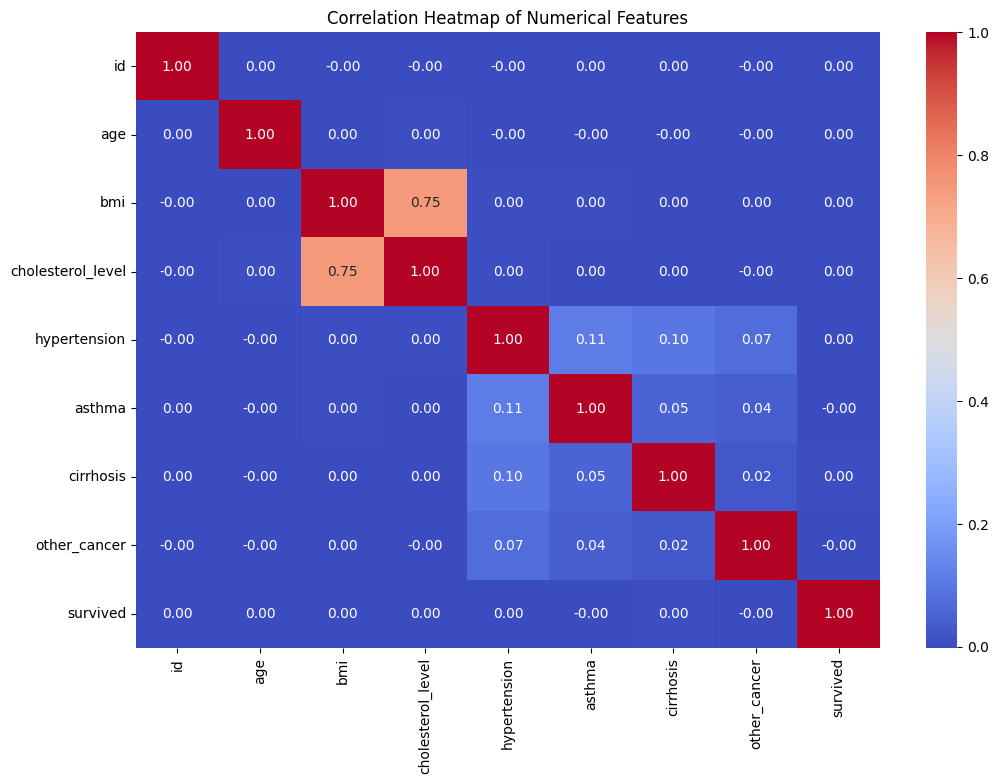

In [24]:
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
plt.close()

# Risk Factor Distributions

**1) Age Distribution among Cancer Patients**

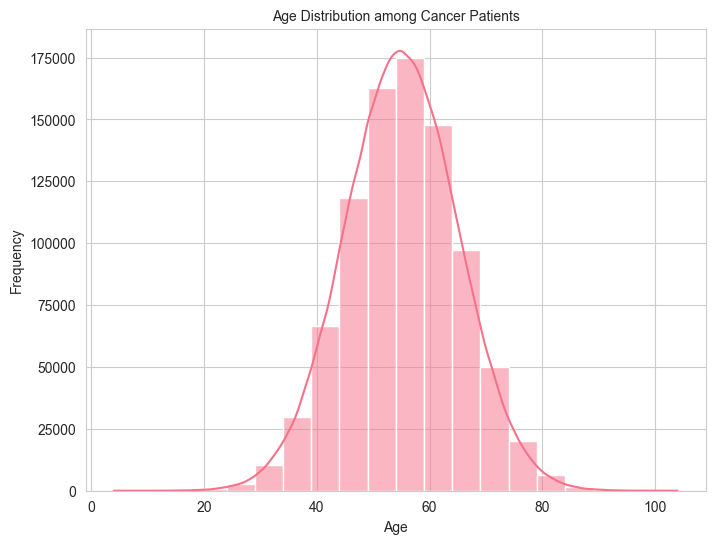

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution among Cancer Patients',fontsize=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**2) Distribution of Cancer Patients across different countries**

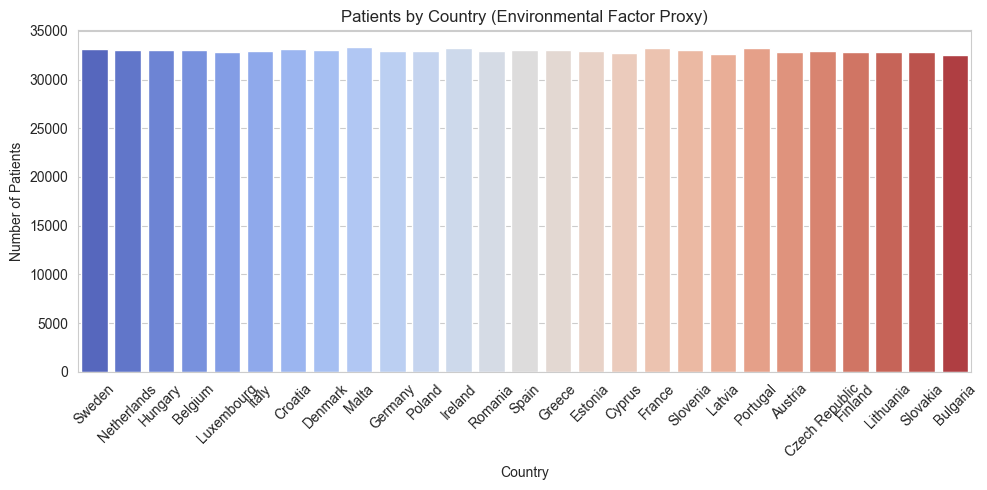

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', data=df, palette='coolwarm')
plt.title('Patients by Country (Environmental Factor Proxy)')
plt.xlabel('Country')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3) Distribution of Cancer Patients by Asthma History**

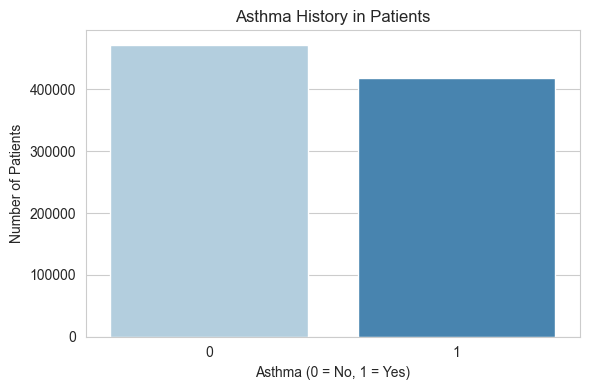

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x='asthma', data=df, palette='Blues')
plt.title('Asthma History in Patients')
plt.xlabel('Asthma (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

**4) Distribution of Smoking Status V/S Cancer Patients**

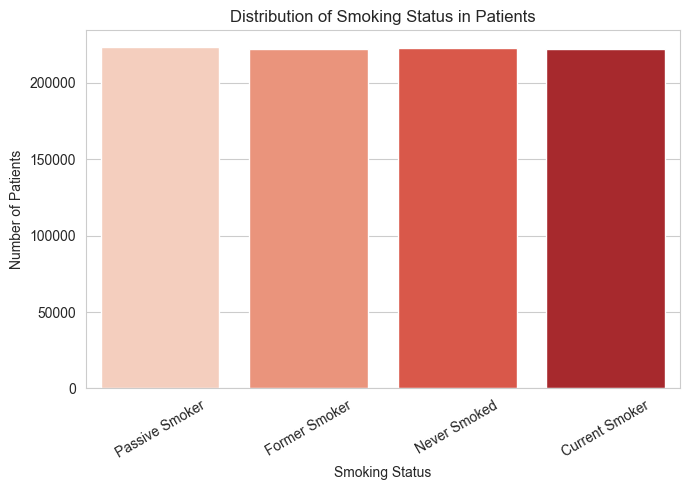

In [99]:
plt.figure(figsize=(7,5))
sns.countplot(x='smoking_status', data=df, palette='Reds')
plt.title('Distribution of Smoking Status in Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**5) Cancer Chances if any Family History**

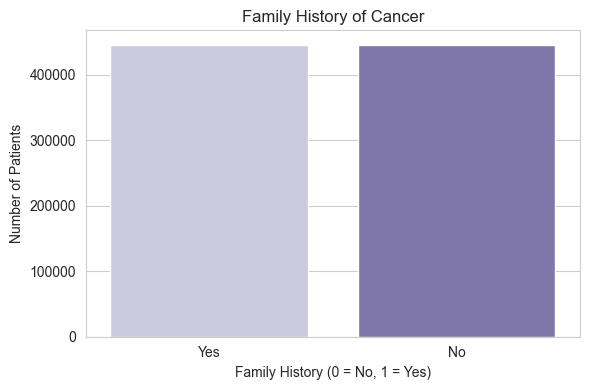

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', data=df, palette='Purples')
plt.title('Family History of Cancer')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

**6) Chances of Lung Cancer if other cancer mutation occurs**

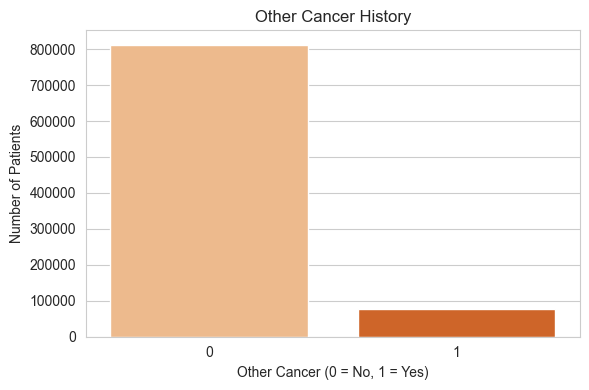

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(x='other_cancer', data=df, palette='Oranges')
plt.title('Other Cancer History')
plt.xlabel('Other Cancer (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Survival Outcome Analysis

**1) Survived V/S Not Survived**

Counts:
 survived
0    693996
1    196004
Name: count, dtype: int64

Percentages:
 survived
0    77.977079
1    22.022921
Name: proportion, dtype: float64


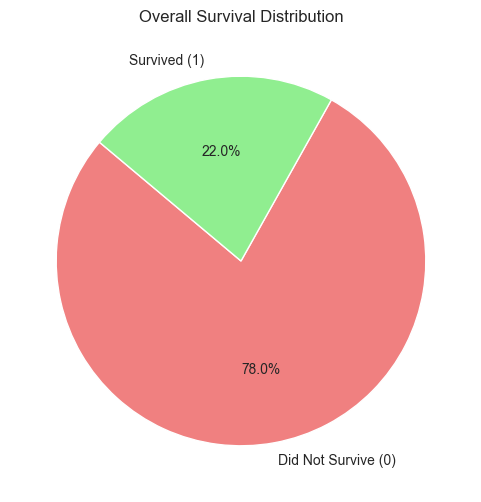

In [68]:
survival_counts = df['survived'].value_counts()
survival_percentage = df['survived'].value_counts(normalize=True) * 100

print("Counts:\n", survival_counts)
print("\nPercentages:\n", survival_percentage)

plt.figure(figsize=(6,6))
colors = ['lightcoral', 'lightgreen']
labels = ['Did Not Survive (0)', 'Survived (1)']
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Overall Survival Distribution')
plt.show()

**2) Survival Rate by Age**

Survival Rate by Age Groups in Percentage: age_group
Young         22.559030
Middle Age    22.312373
Old           22.018463
Name: survived, dtype: float64


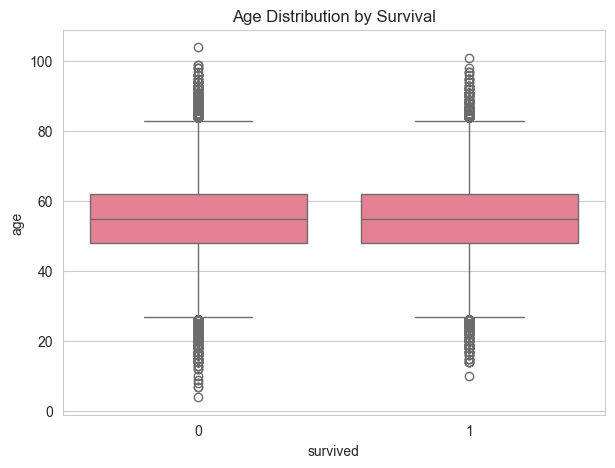

In [39]:
def age_categories(age):
    if age <= 30:
        return 'Young'
    elif 31 >= age <= 60:
        return 'Middle Age'
    else:
        return 'Old'

df['age_group'] = df['age'].apply(age_categories)

survival_rate_age_group = df.groupby('age_group')['survived'].mean().sort_values(ascending=False )
print("Survival Rate by Age Groups in Percentage:", survival_rate_age_group*100)

plt.figure(figsize=(7,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

**3) Survival Rate by Cancer Stage**

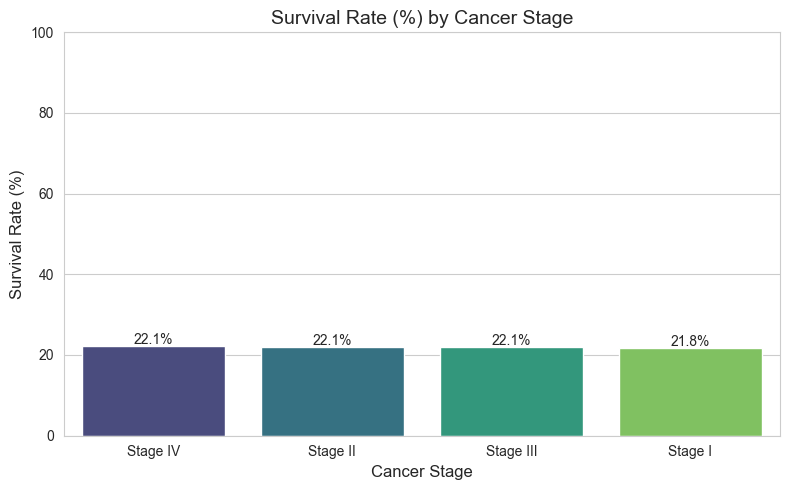

In [54]:
survival_rate_stage = df.groupby('cancer_stage')['survived'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate_stage.index, y=survival_rate_stage.values, palette='viridis')

plt.title('Survival Rate (%) by Cancer Stage', fontsize=14)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)

# Add value labels on top of bars
for i, value in enumerate(survival_rate_stage.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**4) Survival Rate by Treatment Type**

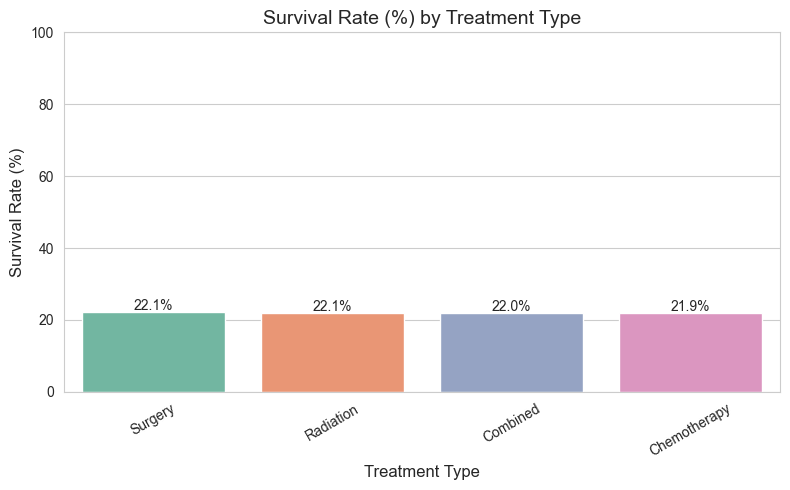

In [57]:
survival_rate_treatment = df.groupby('treatment_type')['survived'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate_treatment.index, y=survival_rate_treatment.values, palette='Set2')

plt.title('Survival Rate (%) by Treatment Type', fontsize=14)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=30)

# Add value labels on top of bars
for i, value in enumerate(survival_rate_treatment.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**5) Impact of BMI on Survival Rate**

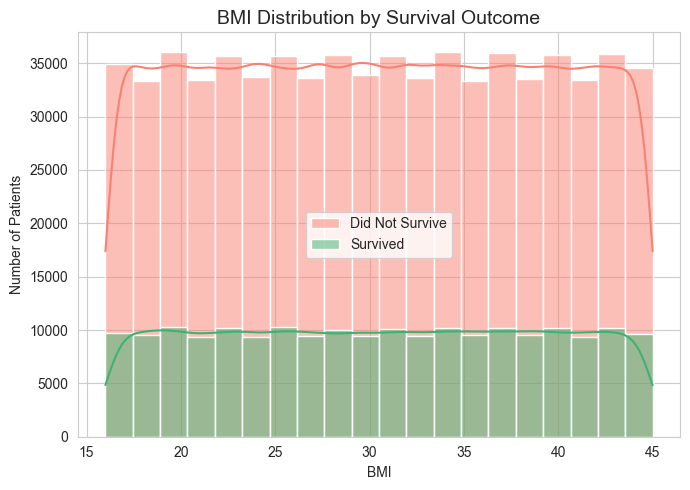

In [95]:
plt.figure(figsize=(7,5))

# Histogram for non-survived
sns.histplot(df[df['survived'] == 0]['bmi'], color='salmon', label='Did Not Survive', kde=True, bins=20)

# Histogram for survived
sns.histplot(df[df['survived'] == 1]['bmi'], color='mediumseagreen', label='Survived', kde=True, bins=20)

plt.title('BMI Distribution by Survival Outcome', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.legend()
plt.tight_layout()
plt.show()

**6) Impact of Cholesterol Level on Survival Rate**

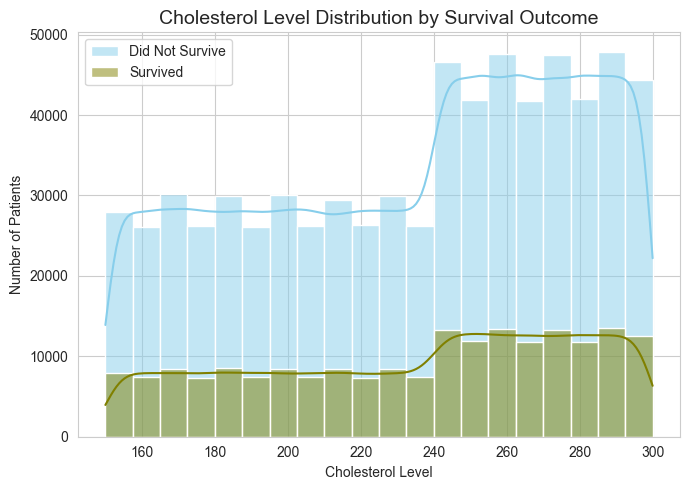

In [96]:
plt.figure(figsize=(7,5))

# Histogram for non-survived
sns.histplot(df[df['survived'] == 0]['cholesterol_level'], color='skyblue', label='Did Not Survive', kde=True, bins=20)

# Histogram for survived
sns.histplot(df[df['survived'] == 1]['cholesterol_level'], color='olive', label='Survived', kde=True, bins=20)

plt.title('Cholesterol Level Distribution by Survival Outcome', fontsize=14)
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.legend()
plt.tight_layout()
plt.show()

# Predictive Modelling

**1) Feature Engineering: Convert raw datetime fields into useful numeric features**

In [83]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

df['diagnosis_year'] = df['diagnosis_date'].dt.year
df['diagnosis_month'] = df['diagnosis_date'].dt.month
df['treatment_year'] = df['end_treatment_date'].dt.year
df['treatment_month'] = df['end_treatment_date'].dt.month
df['treatment_delay_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)

**2) Handle Class Imbalance by Upsampling**

In [85]:
from sklearn.utils import resample
majority = df[df['survived'] == 0]
minority = df[df['survived'] == 1]

minority_upsampled = resample(minority,
                               replace=True,
                               n_samples=len(majority),
                               random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])

**3) Train Test Split**

In [86]:
X = df_balanced.drop('survived', axis=1)
y = df_balanced['survived']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**4) Model Training**

In [87]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

**5) Model Training**

In [103]:
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8720564555347822
              precision    recall  f1-score   support

           0       0.89      0.85      0.87    138800
           1       0.85      0.90      0.88    138799

    accuracy                           0.87    277599
   macro avg       0.87      0.87      0.87    277599
weighted avg       0.87      0.87      0.87    277599



**6) Confusion Matrix**

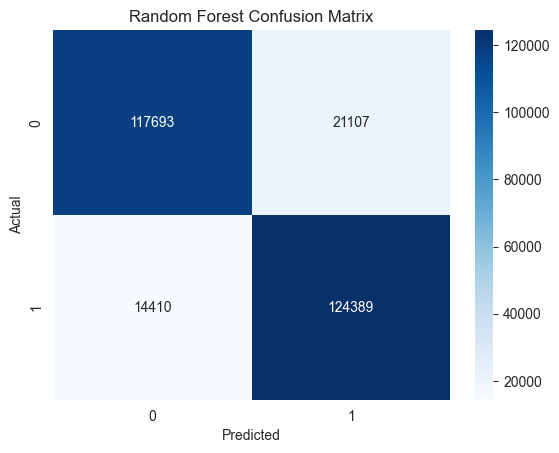

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save Model

In [123]:
import joblib

# Save the trained model
joblib.dump(rf, 'random_forest_model.pkl')

# Save the columns used for training (important when using one-hot encoding)
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

# Conclusion

Through this data science project, we gained valuable insights into the factors influencing lung cancer occurrence and patient survival outcomes. Our exploratory data analysis revealed that **smoking status**, **family history**, **age**, **presence of other cancers**, and **asthma history** are key factors commonly associated with lung cancer cases. 

When analyzing survival outcomes, we observed that **cancer stage**, **treatment type**, **BMI**, **cholesterol levels**, and comorbidities like hypertension and cirrhosis played significant roles in patient prognosis. 

The predictive Random Forest Classifier built during this project achieved an accuracy of **87%**, effectively identifying patterns that distinguish between survivors and non-survivors in the dataset. This highlights the potential of machine learning in supporting healthcare decision-making processes.

Overall, this project demonstrated the power of data science in uncovering meaningful patterns within medical data and provided a deeper understanding of lung cancer-related factors.

In [108]:
X_train.shape

(1110393, 50)

In [109]:
X_test.shape

(277599, 50)

In [111]:
df_balanced.shape

(1387992, 20)

In [113]:
majority.shape

(693996, 20)

In [117]:
minority.shape

(196004, 20)

In [116]:
minority_upsampled.shape

(693996, 20)